# WeRateDogs is in the Twitter Doghouse

WeRateDogs (@dog_rates) boasts 8.9 million followers, a hefty number indeed. Here, we examine the account activity of WeRateDogs for the period of the dataset, and examine the relationship between retweets and favorites.

In [145]:
Image(url=image_pred_df.jpg_url[0], width=600, height=400)

In [ ]:
<div>Image(url=image_pred_df.jpg_url[0], width=600, height=400, align)</div

### Import Libraries

In [137]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import Image

## Visualizing Data

In this section we will visualize the cleaned dataset and examine the following:
1. How did the monthly number of tweets on WeRateDogs change over time?
2. What is the relationship between retweets and favorites?

In [166]:
# import archive master as df
df = pd.read_csv('twitter_archive_master.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.info()

# import image predictions
image_pred_df = pd.read_csv('image_predictions.tsv', sep = '\t')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2356 entries, 2017-08-01 16:23:56+00:00 to 2015-11-15 22:32:08+00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   source              2356 non-null   object 
 2   text                2356 non-null   object 
 3   rating_numerator    2356 non-null   int64  
 4   rating_denominator  2356 non-null   int64  
 5   name                2286 non-null   object 
 6   retweet_count       877 non-null    float64
 7   favorite_count      877 non-null    float64
 8   dogtionary          399 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 184.1+ KB


### Tweets Over Time

In [132]:
# Create copy of df
monthly_tweets = df.groupby(pd.Grouper(level='timestamp', freq="M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp','tweet_id']]
monthly_tweets.rename(columns={'tweet_id':'monthly_count'},inplace=True)
monthly_tweets.set_index('timestamp',inplace=True)
monthly_tweets.head()

,monthly_count
timestamp,
2015-11-30 00:00:00+00:00,302
2015-12-31 00:00:00+00:00,388
2016-01-31 00:00:00+00:00,194
2016-02-29 00:00:00+00:00,125
2016-03-31 00:00:00+00:00,137


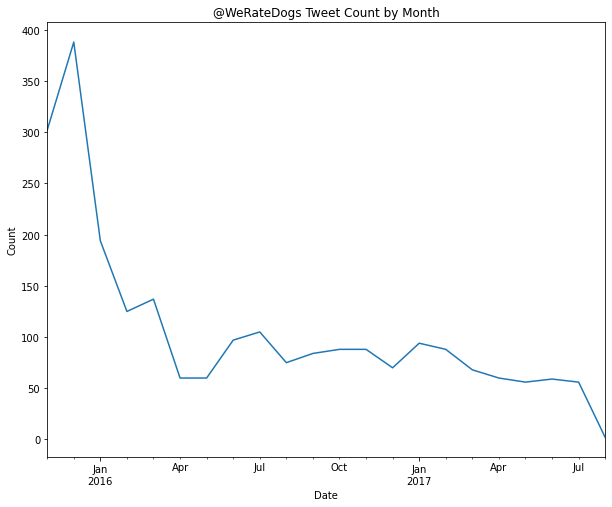

In [133]:
# Plot tweets by month
monthly_tweets.plot(figsize=(10,8), 
                   title='@WeRateDogs Tweet Count by Month',
                   xlabel='Date',
                   ylabel='Count',
                   legend=False);

In [134]:
pct_changes = monthly_tweets.pct_change()
pct_changes.style.format("{:.2%}").highlight_min()

,monthly_count
timestamp,
2015-11-30 00:00:00+00:00,nan%
2015-12-31 00:00:00+00:00,28.48%
2016-01-31 00:00:00+00:00,-50.00%
2016-02-29 00:00:00+00:00,-35.57%
2016-03-31 00:00:00+00:00,9.60%
2016-04-30 00:00:00+00:00,-56.20%
2016-05-31 00:00:00+00:00,0.00%
2016-06-30 00:00:00+00:00,61.67%
2016-07-31 00:00:00+00:00,8.25%


Over the course of the period, the tweet count for the @WeRateDogs account decliined significantly over the period of 2015 to 2017. In the last two months of 2015, the account's tweet count was on the rise, achieving an all time high for the period in December with 388 tweets. However, this sharply contrasts with the account's activity in the following months.

The account had two consecutive months of decreased activity, falling 50% and ~36% in January and February of 2016 respectively. This was followed by an increase in activity in March, but the account would come nowhere near the all-time highs it achieved again. 

### Retweet and Favorites

On Twitter, favorites serve as an effective proxy for user engagement and preferences. However, the reach of online content is ultimately more enhanced by retweets. With retweets, an account's activity can increase the impressions a tweet has by several orders of magnitude. 

In [179]:
# Groupby name and select records with RTs and favorite count information
RT_Fav = df[df[['retweet_count','favorite_count']].isna().any(1) == False] # select records where RTs and favorites not empty
RT_Fav = RT_Fav[RT_Fav['favorite_count'] != 0] # remove retweets only

y=2.582831x+5246.972541


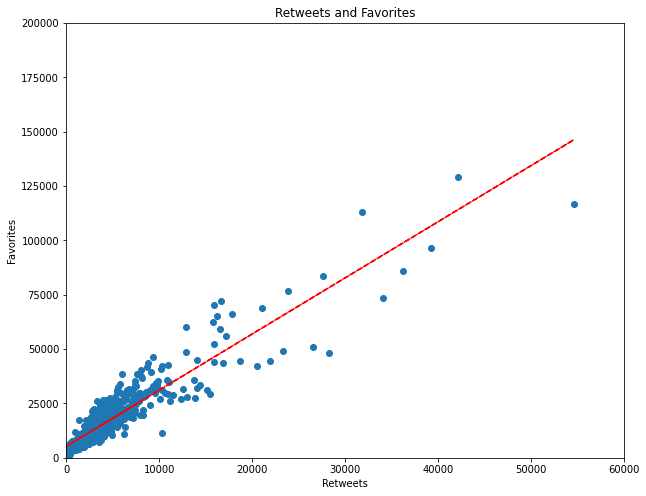

In [180]:
ax = RT_Fav.plot.scatter(x='retweet_count', 
                                y='favorite_count',
                                title='Retweets and Favorites',
                                xlabel='Retweets',
                                ylabel='Favorites',
                                xlim=(0,60000),
                               ylim=(0,200000),
                               figsize=(10,8))

ax.ticklabel_format(style='plain') # change scientific formatting to plain
# ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) # format y-axis labels
# ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) # format x-axis labels

RTs = RT_Fav['retweet_count']
fav = RT_Fav['favorite_count']
plt.plot(RTs,fav,'o')

# calc the trendline
z = numpy.polyfit(RTs, fav, 1)
p = numpy.poly1d(z)
plt.plot(RTs,p(RTs),"r--")
# the line equation:
print("y={:.6f}x+{:.6f}".format(z[0],z[1]))

There is a clear positive relationshup between retweets and favorites. If a WeRateDogs tweet were to get no retweets, it could be expected that it would get about 5,200 likes based on the fitted linear relationship. For each additional retweet, the number of favorites is increased by 2.58. Each retweet nearly triples the number of likes that a post gets!

WeRateDogs may not be stuck in the dog house after all. If the page focuses on gaining retweets of its content, it can expect more user engagement and impressions to continue to grow and share cute dog photos to brighten everyone's day.